In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
data = pd.read_csv('adult.data')

In [3]:
data.info()
data.columns = ['age','work-class','fnlwgt','education','edu-num','marital',
                'occup','relatnip','race','sex','gain','loss','hours','citizenship','>50k']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
39                32560 non-null int64
 State-gov        32560 non-null object
 77516            32560 non-null int64
 Bachelors        32560 non-null object
 13               32560 non-null int64
 Never-married    32560 non-null object
 Adm-clerical     32560 non-null object
 Not-in-family    32560 non-null object
 White            32560 non-null object
 Male             32560 non-null object
 2174             32560 non-null int64
 0                32560 non-null int64
 40               32560 non-null int64
 United-States    32560 non-null object
 <=50K            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
data['>50k'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [5]:
data['>50k'] = data['>50k'].map({' <=50K':0,' >50K':1})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age            32560 non-null int64
work-class     32560 non-null object
fnlwgt         32560 non-null int64
education      32560 non-null object
edu-num        32560 non-null int64
marital        32560 non-null object
occup          32560 non-null object
relatnip       32560 non-null object
race           32560 non-null object
sex            32560 non-null object
gain           32560 non-null int64
loss           32560 non-null int64
hours          32560 non-null int64
citizenship    32560 non-null object
>50k           32560 non-null int64
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [7]:
l = list(data['work-class'].unique())

In [8]:
l

[' Self-emp-not-inc',
 ' Private',
 ' State-gov',
 ' Federal-gov',
 ' Local-gov',
 ' ?',
 ' Self-emp-inc',
 ' Without-pay',
 ' Never-worked']

In [9]:
def rep_mean(var,data):
    l = list(data[var].unique())
    d = dict()
    for obj in l:
        d[obj] = data[data[var]==obj]['>50k'].mean()
    return d

In [10]:
temp1 = rep_mean('work-class',data)
temp1

{' Self-emp-not-inc': 0.2849271940181031,
 ' Private': 0.21867289390200917,
 ' State-gov': 0.27216653816499614,
 ' Federal-gov': 0.38645833333333335,
 ' Local-gov': 0.29479216435738176,
 ' ?': 0.10403050108932461,
 ' Self-emp-inc': 0.557347670250896,
 ' Without-pay': 0.0,
 ' Never-worked': 0.0}

In [11]:
data['work-class'] = data['work-class'].map(temp1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age            32560 non-null int64
work-class     32560 non-null float64
fnlwgt         32560 non-null int64
education      32560 non-null object
edu-num        32560 non-null int64
marital        32560 non-null object
occup          32560 non-null object
relatnip       32560 non-null object
race           32560 non-null object
sex            32560 non-null object
gain           32560 non-null int64
loss           32560 non-null int64
hours          32560 non-null int64
citizenship    32560 non-null object
>50k           32560 non-null int64
dtypes: float64(1), int64(7), object(7)
memory usage: 3.7+ MB


In [12]:
temp2 = rep_mean('education',data)
data['education'] = data['education'].map(temp2)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age            32560 non-null int64
work-class     32560 non-null float64
fnlwgt         32560 non-null int64
education      32560 non-null float64
edu-num        32560 non-null int64
marital        32560 non-null object
occup          32560 non-null object
relatnip       32560 non-null object
race           32560 non-null object
sex            32560 non-null object
gain           32560 non-null int64
loss           32560 non-null int64
hours          32560 non-null int64
citizenship    32560 non-null object
>50k           32560 non-null int64
dtypes: float64(2), int64(7), object(6)
memory usage: 3.7+ MB


In [14]:
temp3 = rep_mean('marital',data)
data['marital'] = data['marital'].map(temp3)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age            32560 non-null int64
work-class     32560 non-null float64
fnlwgt         32560 non-null int64
education      32560 non-null float64
edu-num        32560 non-null int64
marital        32560 non-null float64
occup          32560 non-null object
relatnip       32560 non-null object
race           32560 non-null object
sex            32560 non-null object
gain           32560 non-null int64
loss           32560 non-null int64
hours          32560 non-null int64
citizenship    32560 non-null object
>50k           32560 non-null int64
dtypes: float64(3), int64(7), object(5)
memory usage: 3.7+ MB


In [15]:
temp4 = rep_mean('occup',data)
data['occup'] = data['occup'].map(temp4)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age            32560 non-null int64
work-class     32560 non-null float64
fnlwgt         32560 non-null int64
education      32560 non-null float64
edu-num        32560 non-null int64
marital        32560 non-null float64
occup          32560 non-null float64
relatnip       32560 non-null object
race           32560 non-null object
sex            32560 non-null object
gain           32560 non-null int64
loss           32560 non-null int64
hours          32560 non-null int64
citizenship    32560 non-null object
>50k           32560 non-null int64
dtypes: float64(4), int64(7), object(4)
memory usage: 3.7+ MB


In [16]:
temp5 = rep_mean('relatnip',data)
data['relatnip'] = data['relatnip'].map(temp5)
temp6 = rep_mean('race',data)
data['race'] = data['race'].map(temp6)
temp7 = rep_mean('sex',data)
data['sex'] = data['sex'].map(temp7)
temp8 = rep_mean('citizenship',data)
data['citizenship'] = data['citizenship'].map(temp8)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age            32560 non-null int64
work-class     32560 non-null float64
fnlwgt         32560 non-null int64
education      32560 non-null float64
edu-num        32560 non-null int64
marital        32560 non-null float64
occup          32560 non-null float64
relatnip       32560 non-null float64
race           32560 non-null float64
sex            32560 non-null float64
gain           32560 non-null int64
loss           32560 non-null int64
hours          32560 non-null int64
citizenship    32560 non-null float64
>50k           32560 non-null int64
dtypes: float64(8), int64(7)
memory usage: 3.7 MB


In [18]:
data['net'] = data['gain']+data['loss']
x = data.corr()
x

,age,work-class,fnlwgt,education,edu-num,marital,occup,relatnip,race,sex,gain,loss,hours,citizenship,>50k,net
age,1.000000,0.134998,-0.076646,0.109715,0.036527,0.352620,0.129828,0.359716,0.032154,0.088832,0.077674,0.057775,0.068756,0.054978,0.234039,0.080846
work-class,0.134998,1.000000,-0.032832,0.165634,0.154310,0.146840,0.256467,0.152018,0.034066,0.103501,0.085594,0.043664,0.188729,0.039247,0.179216,0.087997
fnlwgt,-0.076646,-0.032832,1.000000,-0.032106,-0.043159,-0.029536,-0.021393,-0.029521,-0.090370,0.026882,0.000437,-0.010259,-0.018770,-0.117966,-0.009481,-0.000123
education,0.109715,0.165634,-0.032106,1.000000,0.908682,0.121959,0.510740,0.145761,0.100876,0.044338,0.159983,0.095320,0.167560,0.161615,0.368866,0.165223
edu-num,0.036527,0.154310,-0.043159,0.908682,1.000000,0.085117,0.483436,0.108189,0.094836,0.012256,0.122627,0.079932,0.148127,0.242732,0.335182,0.127019
marital,0.352620,0.146840,-0.029536,0.121959,0.085117,1.000000,0.190817,0.970910,0.124519,0.416926,0.086812,0.080871,0.220836,0.033695,0.447396,0.091246
occup,0.129828,0.256467,-0.021393,0.510740,0.483436,0.190817,1.000000,0.207959,0.110016,0.096548,0.111540,0.083864,0.214347,0.123727,0.351885,0.116143
relatnip,0.359716,0.152018,-0.029521,0.145761,0.108189,0.970910,0.207959,1.000000,0.124968,0.416043,0.089336,0.084987,0.235568,0.037567,0.453578,0.093995
race,0.032154,0.034066,-0.090370,0.100876,0.094836,0.124519,0.110016,0.124968,1.000000,0.112423,0.021509,0.025955,0.051207,0.065144,0.100819,0.022930
sex,0.088832,0.103501,0.026882,0.044338,0.012256,0.416926,0.096548,0.416043,0.112423,1.000000,0.048477,0.045572,0.229312,0.004124,0.215995,0.050975


In [19]:
data['thresh1'] = 1000*(0.368866*data['education']+0.351885*data['occup'])
data['thresh2'] = 1000*(0.447396*data['marital']+0.453578*data['relatnip'])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 18 columns):
age            32560 non-null int64
work-class     32560 non-null float64
fnlwgt         32560 non-null int64
education      32560 non-null float64
edu-num        32560 non-null int64
marital        32560 non-null float64
occup          32560 non-null float64
relatnip       32560 non-null float64
race           32560 non-null float64
sex            32560 non-null float64
gain           32560 non-null int64
loss           32560 non-null int64
hours          32560 non-null int64
citizenship    32560 non-null float64
>50k           32560 non-null int64
net            32560 non-null int64
thresh1        32560 non-null float64
thresh2        32560 non-null float64
dtypes: float64(10), int64(8)
memory usage: 4.5 MB


In [21]:
features = ['age','gain','loss','hours','citizenship','sex','thresh1','thresh2']
X = data[features]

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 8 columns):
age            32560 non-null int64
gain           32560 non-null int64
loss           32560 non-null int64
hours          32560 non-null int64
citizenship    32560 non-null float64
sex            32560 non-null float64
thresh1        32560 non-null float64
thresh2        32560 non-null float64
dtypes: float64(4), int64(4)
memory usage: 2.0 MB


In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,roc_auc_score
from sklearn.linear_model import LogisticRegression

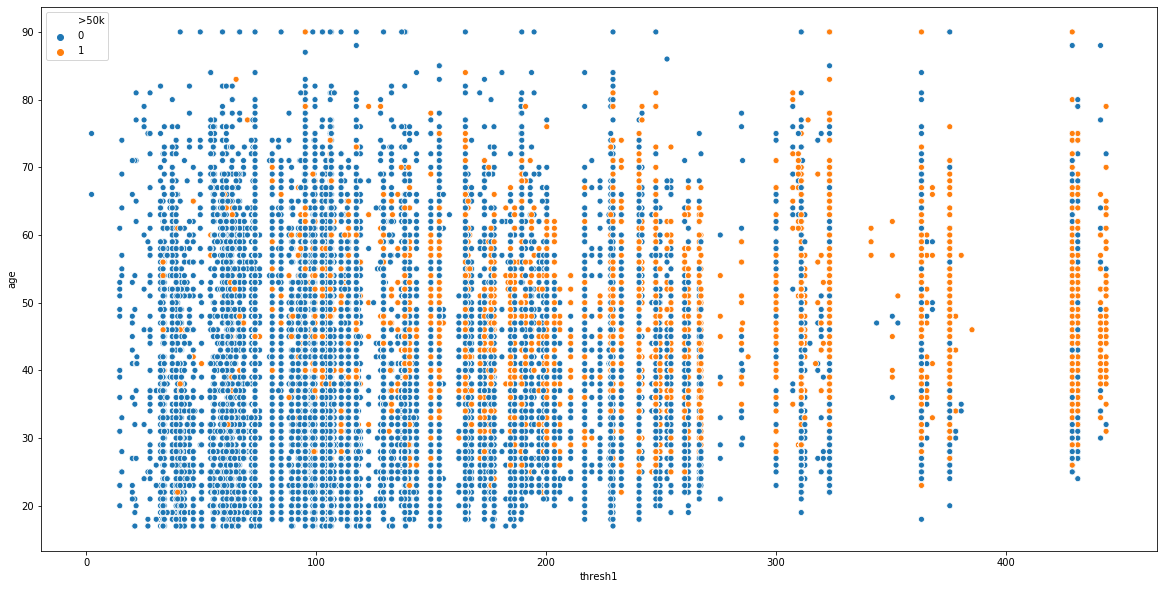

In [24]:
sns.scatterplot(x = 'thresh1',y = 'age',hue = '>50k',data = data)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
y = data[['>50k']]

In [27]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 1 columns):
>50k    32560 non-null int64
dtypes: int64(1)
memory usage: 254.5 KB


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24420 entries, 19992 to 10967
Data columns (total 8 columns):
age            24420 non-null int64
gain           24420 non-null int64
loss           24420 non-null int64
hours          24420 non-null int64
citizenship    24420 non-null float64
sex            24420 non-null float64
thresh1        24420 non-null float64
thresh2        24420 non-null float64
dtypes: float64(4), int64(4)
memory usage: 1.7 MB


In [30]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24420 entries, 19992 to 10967
Data columns (total 1 columns):
>50k    24420 non-null int64
dtypes: int64(1)
memory usage: 381.6 KB


In [31]:
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
grad_b = GradientBoostingClassifier()
ada_b = AdaBoostClassifier()
disc = LinearDiscriminantAnalysis()
nei = KNeighborsClassifier()
log = LogisticRegression()
nb = GaussianNB()

In [32]:
models = [nb,tree,forest,grad_b,ada_b,disc,nei,log]

In [33]:
for model in models:
    print(model)
    model.fit(X_train,y_train.values.ravel())
    print(confusion_matrix(y_train,model.predict(X_train)))
    print(confusion_matrix(y_test,model.predict(X_test)))

GaussianNB(priors=None, var_smoothing=1e-09)
[[17608   916]
 [ 3756  2140]]
[[5877  318]
 [1218  727]]
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
[[18378   146]
 [  689  5207]]
[[5478  717]
 [ 772 1173]]
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estim

In [46]:
final_model = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.37, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
final_model.fit(X,y.values.ravel())
print(confusion_matrix(y,final_model.predict(X)))
print(roc_auc_score(y,final_model.predict(X)))

[[23432  1287]
 [ 2556  5285]]
0.8109779788874908


In [35]:
test_data= pd.read_csv('adult.test')

In [36]:
test_data.columns = ['age','work-class','fnlwgt','education','edu-num','marital',
                'occup','relatnip','race','sex','gain','loss','hours','citizenship','>50k']
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 15 columns):
age            16280 non-null int64
work-class     16280 non-null object
fnlwgt         16280 non-null int64
education      16280 non-null object
edu-num        16280 non-null int64
marital        16280 non-null object
occup          16280 non-null object
relatnip       16280 non-null object
race           16280 non-null object
sex            16280 non-null object
gain           16280 non-null int64
loss           16280 non-null int64
hours          16280 non-null int64
citizenship    16280 non-null object
>50k           16280 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [37]:
test_data['>50k'].unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [38]:
test_data['>50k'] = test_data['>50k'].map({' <=50K.':0,' >50K.':1})

In [39]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 15 columns):
age            16280 non-null int64
work-class     16280 non-null object
fnlwgt         16280 non-null int64
education      16280 non-null object
edu-num        16280 non-null int64
marital        16280 non-null object
occup          16280 non-null object
relatnip       16280 non-null object
race           16280 non-null object
sex            16280 non-null object
gain           16280 non-null int64
loss           16280 non-null int64
hours          16280 non-null int64
citizenship    16280 non-null object
>50k           16280 non-null int64
dtypes: int64(7), object(8)
memory usage: 1.9+ MB


In [40]:
test_data['net'] = test_data['gain']+test_data['loss']
test_data['work-class'] = test_data['work-class'].map(temp1)
test_data['education'] = test_data['education'].map(temp2)
test_data['marital'] = test_data['marital'].map(temp3)
test_data['occup'] = test_data['occup'].map(temp4)
test_data['relatnip'] = test_data['relatnip'].map(temp5)
test_data['race'] = test_data['race'].map(temp6)
test_data['sex'] = test_data['sex'].map(temp7)
test_data['citizenship'] = test_data['citizenship'].map(temp8)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 16 columns):
age            16280 non-null int64
work-class     16280 non-null float64
fnlwgt         16280 non-null int64
education      16280 non-null float64
edu-num        16280 non-null int64
marital        16280 non-null float64
occup          16280 non-null float64
relatnip       16280 non-null float64
race           16280 non-null float64
sex            16280 non-null float64
gain           16280 non-null int64
loss           16280 non-null int64
hours          16280 non-null int64
citizenship    16280 non-null float64
>50k           16280 non-null int64
net            16280 non-null int64
dtypes: float64(8), int64(8)
memory usage: 2.0 MB


In [41]:
test_data['thresh1'] = 1000*(0.179216*test_data['work-class']+0.368866*test_data['education']+0.351885*test_data['occup']+0.098707*test_data['citizenship'])
test_data['thresh2'] = 1000*(0.447396*test_data['marital']+0.453578*test_data['relatnip']+0.215995*test_data['sex']+0.100819*test_data['race'])
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 18 columns):
age            16280 non-null int64
work-class     16280 non-null float64
fnlwgt         16280 non-null int64
education      16280 non-null float64
edu-num        16280 non-null int64
marital        16280 non-null float64
occup          16280 non-null float64
relatnip       16280 non-null float64
race           16280 non-null float64
sex            16280 non-null float64
gain           16280 non-null int64
loss           16280 non-null int64
hours          16280 non-null int64
citizenship    16280 non-null float64
>50k           16280 non-null int64
net            16280 non-null int64
thresh1        16280 non-null float64
thresh2        16280 non-null float64
dtypes: float64(10), int64(8)
memory usage: 2.2 MB


In [42]:
test_X = test_data[features]
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 8 columns):
age            16280 non-null int64
gain           16280 non-null int64
loss           16280 non-null int64
hours          16280 non-null int64
citizenship    16280 non-null float64
sex            16280 non-null float64
thresh1        16280 non-null float64
thresh2        16280 non-null float64
dtypes: float64(4), int64(4)
memory usage: 1017.6 KB


In [43]:
test_Y = test_data[['>50k']]
test_Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 1 columns):
>50k    16280 non-null int64
dtypes: int64(1)
memory usage: 127.3 KB


In [44]:
print(confusion_matrix(test_Y,final_model.predict(test_X)))

[[10732  1702]
 [  853  2993]]


In [45]:
roc_auc_score(test_Y,final_model.predict(test_X))

0.8206641937866672